## Shrinkage Methods : L2 (Ridge) and L1 (Lasso) regularization for multivariate linear regression

Last week, you observed the effects of overfitting of given data because of high model complexity on "data_poly1.npz" and "data_poly2.npz". You saw how overfitting occured due to the least squares regression model describing random errors or noise in the data instead of the underlying distribution thus causing an increase in test error. (although the training error reduced with increasing complexity). This week we will explore the two main explanations of the overfitting phenomenon :
- High model complexity
- Multicollinearity of predictors

Then we will go on to look at the two most widely used techniques to reduce overfitting of data on using linear regression models: Ridge and Lasso regression.

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from scipy.interpolate import spline
from sklearn.metrics import mean_squared_error
data = np.load('data_poly1.npz')
val = np.load('data_poly2.npz')
x = data['x']
y = data['y']
data = np.array([x, y]).T
xval = val['x']
yval = val['y']
val_data = np.array([xval,yval]).T
data = data[data[:,0].argsort()]
x = data[:,0]
y = data[:,1]
val_data = val_data[val_data[:,0].argsort()]
xval = val_data[:,0]
yval = val_data[:,1]

### Overfitting of data due to high model complexity

#### Ridge regression
Last week you fit a $9$th order polynomial to the given dataset "data_poly1.npz" containing 10 distinct points. The polynomial fit all the data points exactly and thus wrongly modelled the noise too. 
- Now use polynomial regression of order 9 along with L2 norm regularization (Ridge regression) on "data_poly1.npz" for $\lambda=0, 0.1, 1, 10$ and $100$ and plot the true vs predicted values for each $\lambda$. 

In [90]:
X = np.reshape(x, (10,1))
X = np.hstack((np.ones((10,1)), X))


In [91]:
poly = PolynomialFeatures(9)
X = poly.fit_transform(X)
X = np.unique(X, axis = 1)


In [92]:
xval = np.reshape(xval, (10,1))
xval = np.hstack((np.ones((10,1)), xval))
xval = poly.fit_transform(xval)
xval = np.unique(xval, axis = 1)

In [113]:
alphas = [0,0.1,1,10,100]

C:\Users\Rohit Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.680153e-20
  overwrite_a=True).T
C:\Users\Rohit Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.680153e-19
  overwrite_a=True).T
C:\Users\Rohit Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.680153e-18
  overwrite_a=True).T
C:\Users\Rohit Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.819846e-17
  over

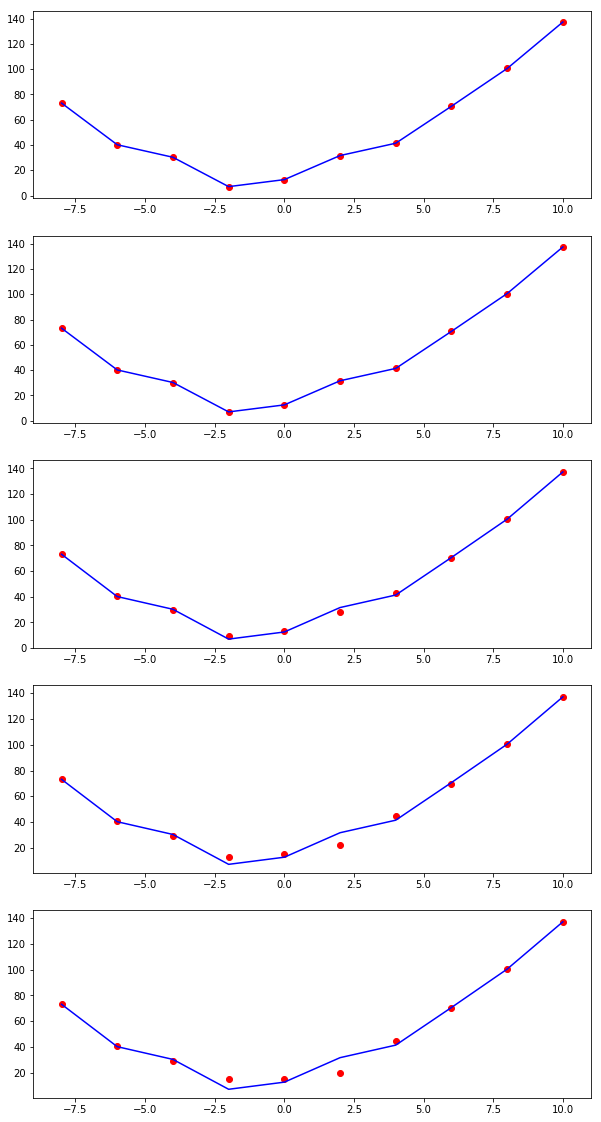

In [117]:
fig, ax = plt.subplots(nrows = 5, ncols = 1, figsize = (10,20))
for i, alpha_val in enumerate(alphas):
    model = Ridge(alpha = alpha_val)
    model.fit(X,y)
    predictions = model.predict(X)
    ax[i].plot(x,y,color =  'b')
    ax[i].scatter(x, predictions, color = 'r')

C:\Users\Rohit Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
C:\Users\Rohit Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Rohit Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


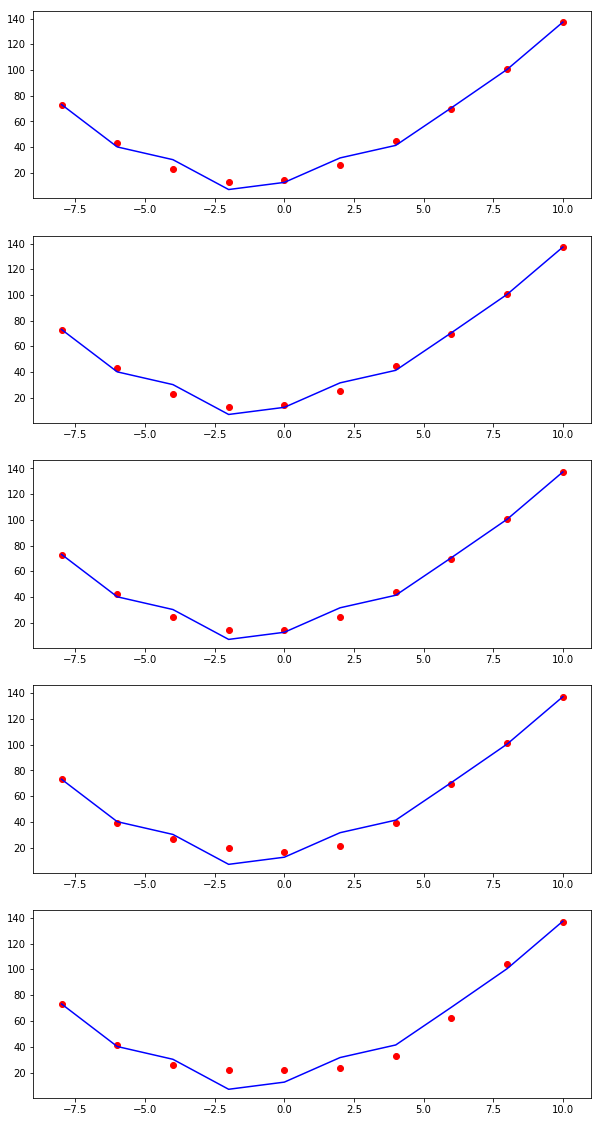

In [118]:
fig, ax = plt.subplots(nrows = 5, ncols = 1, figsize = (10,20))
for i, alpha_val in enumerate(alphas):
    model = Lasso(alpha = alpha_val)
    model.fit(X,y)
    predictions = model.predict(X)
    ax[i].plot(x,y,color =  'b')
    ax[i].scatter(x, predictions, color = 'r')

Plot the training and validation set ("data_poly2.npz") mean square errors vs $\lambda$ for ridge and lasso regression. Compare with least squares polynomial regression of order $9$ from the previous week.  

In [101]:
alphas = np.logspace(-3,3,50)

In [94]:
alphas

[0, 0.1, 1, 10, 100]

C:\Users\Rohit Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.680153e-22
  overwrite_a=True).T
C:\Users\Rohit Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Rohit Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.283309e-21
  overwrite_a=True).T
C:\Users\Rohit Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal cond

C:\Users\Rohit Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.839299e-17
  overwrite_a=True).T
C:\Users\Rohit Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.389888e-17
  overwrite_a=True).T
C:\Users\Rohit Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.121952e-17
  overwrite_a=True).T
C:\Users\Rohit Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.095426e-17
  over

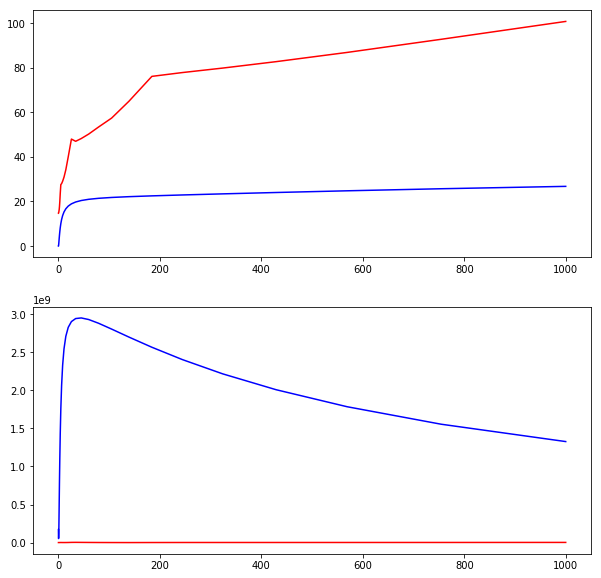

In [102]:
ridge_train_error = []
ridge_test_error = []
lasso_train_error = []
lasso_test_error = []

for alpha_val in alphas:
    model1 = Ridge(alpha = alpha_val)
    model2 = Lasso(alpha = alpha_val)
    model1.fit(X,y)
    model2.fit(X,y)
    r_train_pred = model1.predict(X)
    r_test_pred = model1.predict(xval)
    l_train_pred = model2.predict(X)
    l_test_pred = model2.predict(xval)
    ridge_train_error.append(mean_squared_error(r_train_pred, y))
    ridge_test_error.append(mean_squared_error(r_test_pred, yval))
    lasso_train_error.append(mean_squared_error(l_train_pred, y))
    lasso_test_error.append(mean_squared_error(l_test_pred, yval))
    
    
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (10,10))
ax[0].plot(alphas, ridge_train_error, 'b')
ax[0].plot(alphas, lasso_train_error, 'r')

ax[1].plot(alphas, ridge_test_error, 'b')
ax[1].plot(alphas, lasso_test_error, 'r')

#### Observations and inferences:
- Explain how the variances of the least squares estimates vary as the number of features increase. Comment for the following three cases :
 - n>>p
 - n~p
 - n<p

n : number of data points <br>
p : number of features <br>
- Why do ridge and lasso regression improve over least squares regression? Make arguments based on the training and validation set error plots.
- What can you say about the model complexity as $\lambda$ increases?

1) n >> p - then the least square estimates will have low variance and hence will perform well on test observations.
2) n~p - there can be a lot of variability in the least squares fit there can be lot of variability in the least squares fit , resulting in overfitting and poor predictions.
3) n<p - then there is no unique least squares coefficient estimate; the variance of this method will be infinite and cannot be used at all.

 - Based on the plot we can see that the ridge and lasso decreases the overfitting of the model. In the first plot where          where lambda = 0 the model is perfectly fit on the train data as the lambda increases the added constraint on the estimates makes it a quadratic curve.
 - The model complexity decreases as lambda increases.

### Overfitting of data due to multicollinearity

The coefficient estimates of least squares regression can also change erratically in responses to small changes in data when the predictors are highly correlated. 

#### Uncorrelated features
The three columns of $X$ contain the three features. $Y$ is generated as a linear combination of two features as shown. 
- Compute the correlations between the features.
- Fit a linear regression, lasso ($\lambda=0.1$) and ridge ($\lambda=10$) regression model and compare the coefficients with the expected coefficients. 
- Does the linear regression model recover the underlying structure of the data? (despite significant noise in the data)
- How often do you think that real life datasets have uncorrelated features? 
- Which of the two methods (ridge and lasso regression) performs feature selection? Which model results in sparser weights?



In [13]:
import numpy as np

np.random.seed(0)
size = 5000
X = np.random.normal(0, 1, (size, 3))
#Y = X0 + 2*X1 + noise
#X0,X1 and X2 are the features
Y = X[:,0] + 2*X[:,1] + np.random.normal(0, 2, size)

print('Correlation Matrix: ')
print(np.corrcoef(X.T))
linear_reg_model = LinearRegression()
ridge_model = Ridge(alpha = 10)
lasso_model = Lasso(alpha = 0.1)
linear_reg_model.fit(X,Y)
ridge_model.fit(X, Y)
lasso_model.fit(X, Y)
print('Coefficients of Linear Regression Model: ', linear_reg_model.coef_)
print('Coefficients of Ridge model: ', ridge_model.coef_)
print('Coefficients of Lasso Model: ', lasso_model.coef_)

Correlation Matrix: 
[[ 1.          0.01568331 -0.01206625]
 [ 0.01568331  1.          0.01373401]
 [-0.01206625  0.01373401  1.        ]]
Coefficients of Linear Regression Model:  [ 0.98422873  1.99522378 -0.04074316]
Coefficients of Ridge model:  [ 0.98231412  1.99112131 -0.04062747]
Coefficients of Lasso Model:  [ 0.88555304  1.89248636 -0.        ]


- Yes the linear regression model undercovers the structure of the data but there is an coefficient estimate of X2 in both ridge and linear regression.
- For example, classification of cats and dog images, the features such as color and the edges are definetly uncorrelated to each other. For voice detection the sound of each letter will have different amplitude and frequency which are completely uncorrelated to each other. The process of  generating data can contain several variables and in them the process of generation of these variables can be completely different and with an error associated with it. And also the presence of uncorrelated features makes learning process easy. 
- Lasso regression perfoms better feature selection as you can observe that the coefficient of X2 is approximately zero. Lasso regression results in sparser weights. 

#### Correlated features
The three columns of $X$ contain three features. $Y$ is generated as a linear combination of the three features using 10 different random seeds as shown.
- Compute the correlations between the features.
- Fit a linear, lasso ($\lambda=0.1$) and ridge ($\lambda=10$) regression model corresponding to data generated from each random seed and compare the coefficients with the expected coefficients.
- Compare the stability of the three models. Here stability is wrt fluctuations in coefficients on minor changes in data achieved through a different random seed in each iteration.
- Do you expect lasso and ordinary linear regression models to be stable for datsets with correlated features? Explain giving reasons.

In [15]:
size = 100
 
#We run the method 10 times with different random seeds
for i in range(10):
    print("Random seed %s" % i)
    np.random.seed(seed=i)
    X_seed = np.random.normal(0, 1, size)
    #X0,X1 and X2 are the features
    X0 = X_seed + np.random.normal(0, .1, size)
    X1 = X_seed + np.random.normal(0, .1, size)
    X2 = X_seed + np.random.normal(0, .1, size)
    Y = X0 + X1 + X2 + np.random.normal(0, 1, size)
    X = np.array([X0, X1, X2]).T
    print('Correlation Matrix: ')
    print(np.corrcoef(X.T))
    linear_reg = LinearRegression()
    ridge_model = Ridge(alpha = 10)
    lasso_model = Lasso(alpha = 0.1)
    linear_reg.fit(X, Y)
    ridge_model.fit(X,Y)
    lasso_model.fit(X,Y)
    print('Coefficients of linear model: ', linear_reg.coef_)
    print('Coefficients of Ridge model: ', ridge_model.coef_)
    print('Coefficients of Lasso model: ', lasso_model.coef_)


Random seed 0
Correlation Matrix: 
[[1.         0.99107886 0.9914997 ]
 [0.99107886 1.         0.99254973]
 [0.9914997  0.99254973 1.        ]]
Coefficients of linear model:  [ 0.7284403   2.30926001 -0.08219169]
Coefficients of Ridge model:  [0.93832131 1.05887277 0.87652644]
Coefficients of Lasso model:  [0.68342507 2.1773519  0.        ]
Random seed 1
Correlation Matrix: 
[[1.         0.99061655 0.98680909]
 [0.99061655 1.         0.98560791]
 [0.98680909 0.98560791 1.        ]]
Coefficients of linear model:  [ 1.15181561  2.36579916 -0.59900864]
Coefficients of Ridge model:  [0.98409577 1.06792673 0.75855367]
Coefficients of Lasso model:  [0.85351108 1.95094851 0.        ]
Random seed 2
Correlation Matrix: 
[[1.         0.99079128 0.98962272]
 [0.99079128 1.         0.991474  ]
 [0.98962272 0.991474   1.        ]]
Coefficients of linear model:  [0.69734749 0.32155864 2.08590886]
Coefficients of Ridge model:  [0.97159124 0.94256202 1.08539406]
Coefficients of Lasso model:  [0.763973

- Ridge model is more stable than compared to Lasso and linear regression model and linear regression model is more stable than lasso ( based on comparing the coefficients above).
- No due to presence the correlated features the coefficents of lasso and linear model have high variance in their estimates i.e the coefficients fluctuate a lot for each iteration in the data.